In [88]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv("url_dataset.csv")
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [90]:
df.drop(["FILENAME"], axis=1,inplace=True)

## Data balancing

In [91]:
class_distribution = df['label'].value_counts()

print("Class distribution:\n", class_distribution)

# Calculate percentage distribution
class_percentage = df['label'].value_counts(normalize=True) * 100
print("\nPercentage distribution:\n", class_percentage)


Class distribution:
 1    134850
0    100945
Name: label, dtype: int64

Percentage distribution:
 1    57.189508
0    42.810492
Name: label, dtype: float64


In [92]:
#%pip install imbalanced-learn


In [93]:
#%pip install --upgrade scikit-learn imbalanced-learn

In [94]:
# from imblearn.over_sampling import SMOTE

# # Features and target variable
# X = df.drop('label', axis=1)
# y = df['label']

# # Apply SMOTE
# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X, y)

# # Combine the resampled features and target variable into a DataFrame
# balanced_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote, columns=['label'])], axis=1)

# print("Balanced class distribution:\n", balanced_data['label'].value_counts())


In [95]:
phishing = df[df["label"]==1]
non_phishing = df[df["label"]==0]
# print(phishing)

In [96]:
from sklearn.utils import resample
# Undersample the majority class
phishing_undersampled = resample(phishing,
                                 replace=False,   # Sample without replacement
                                 n_samples=len(non_phishing), # Match number of non-phishing samples
                                 random_state=42) # Reproducibility

# Combine undersampled phishing with original non-phishing data
balanced_data = pd.concat([phishing_undersampled, non_phishing])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced class distribution:\n", balanced_data['label'].value_counts())


Balanced class distribution:
 1    100945
0    100945
Name: label, dtype: int64


## Data familarizing

In [97]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201890 entries, 0 to 201889
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         201890 non-null  object 
 1   URLLength                   201890 non-null  int64  
 2   Domain                      201890 non-null  object 
 3   DomainLength                201890 non-null  int64  
 4   IsDomainIP                  201890 non-null  int64  
 5   TLD                         201890 non-null  object 
 6   URLSimilarityIndex          201890 non-null  float64
 7   CharContinuationRate        201890 non-null  float64
 8   TLDLegitimateProb           201890 non-null  float64
 9   URLCharProb                 201890 non-null  float64
 10  TLDLength                   201890 non-null  int64  
 11  NoOfSubDomain               201890 non-null  int64  
 12  HasObfuscation              201890 non-null  int64  
 13  NoOfObfuscated

In [98]:
balanced_data.shape

(201890, 55)

In [99]:
balanced_data.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'labe

In [100]:
df=balanced_data
df.shape

(201890, 55)

## visualizing

In [101]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

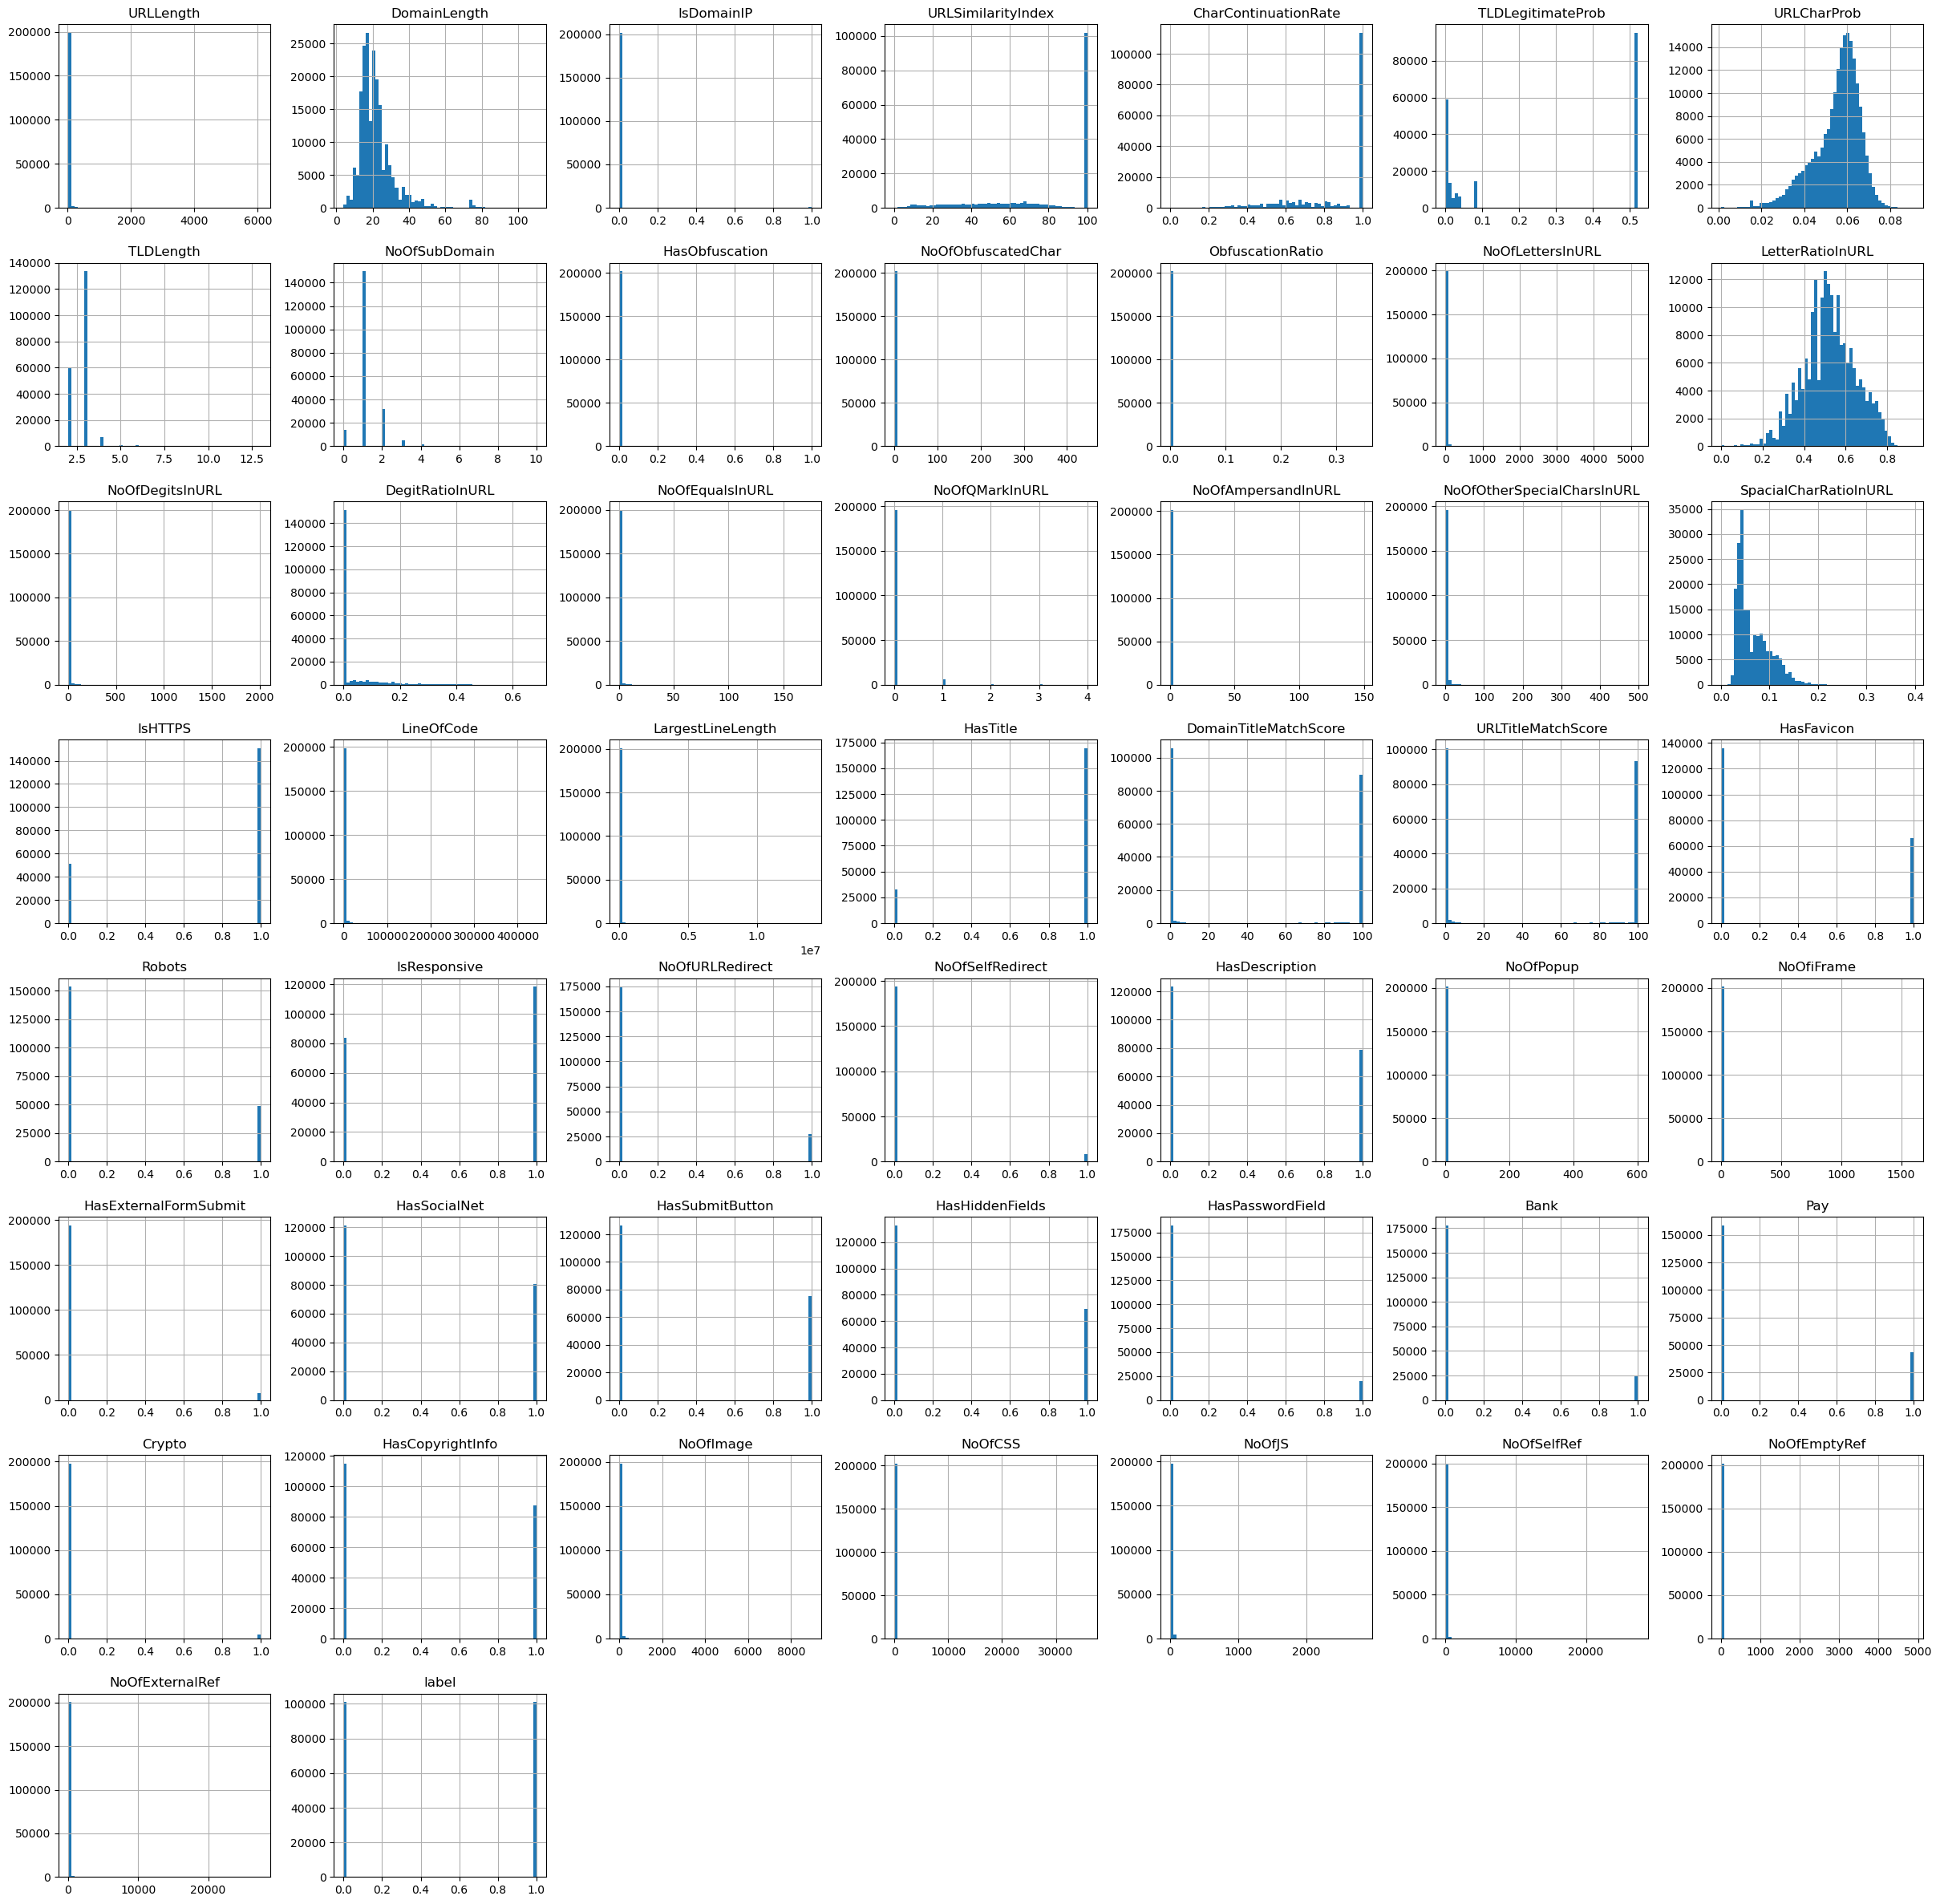

In [102]:
df.hist(bins=60,figsize=(30,30))
plt.show()

C:\Users\sandesh lavshetty\AppData\Local\Temp\ipykernel_17580\2594808200.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


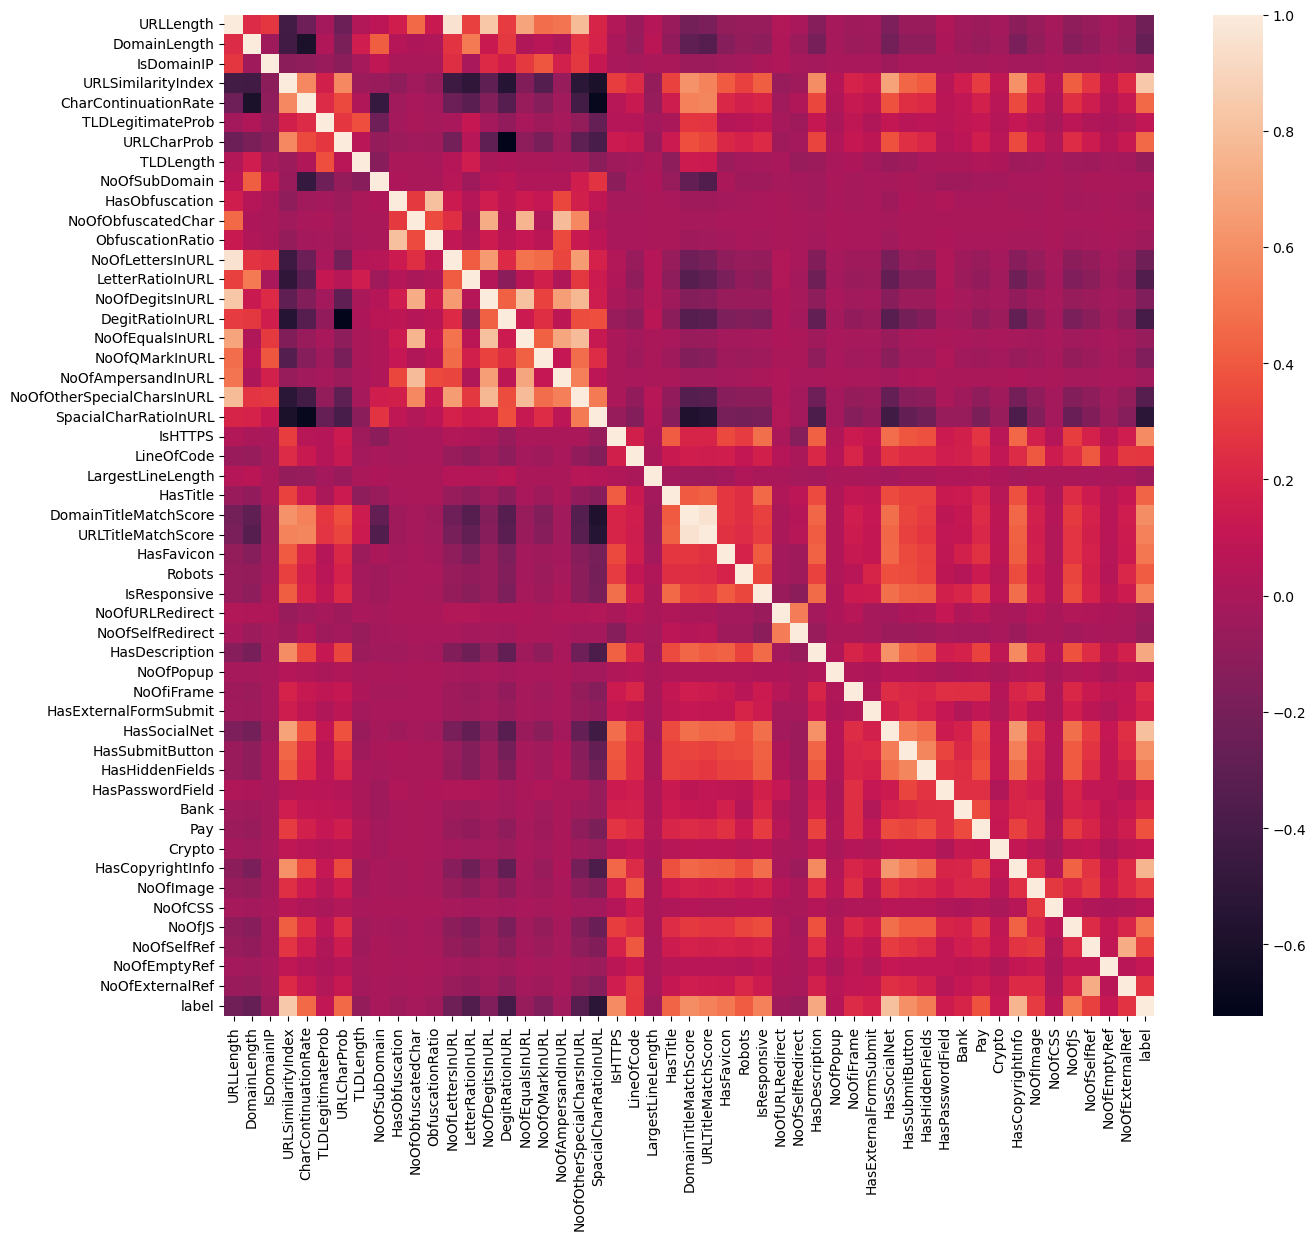

In [103]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [104]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation values for the 'label' column
label_correlation = correlation_matrix['label'].sort_values(ascending=False)

print("Correlation of all columns with 'label':\n", label_correlation)


C:\Users\sandesh lavshetty\AppData\Local\Temp\ipykernel_17580\1450755875.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation of all columns with 'label':
 label                         1.000000
URLSimilarityIndex            0.844726
HasSocialNet                  0.804686
HasCopyrightInfo              0.756266
HasDescription                0.709506
HasSubmitButton               0.596296
DomainTitleMatchScore         0.593054
IsHTTPS                       0.583325
URLTitleMatchScore            0.544996
IsResponsive                  0.544418
HasHiddenFields               0.524831
HasFavicon                    0.510996
NoOfJS                        0.505959
URLCharProb                   0.460952
CharContinuationRate          0.457768
HasTitle                      0.436072
Robots                        0.409437
Pay                           0.375808
NoOfSelfRef                   0.317679
NoOfImage                     0.295795
LineOfCode                    0.276318
NoOfExternalRef               0.265043
NoOfiFrame                    0.230104
Bank                          0.198191
HasExternalFormSubmit 

### Point Biserial Correlation (for binary classification)

In [105]:
from scipy.stats import pointbiserialr

# Calculate Point Biserial Correlation for each numeric feature with the label
correlations = {}
for column in df.drop('label', axis=1).select_dtypes(include=['number']).columns:
    correlations[column], _ = pointbiserialr(df[column], df['label'])

# Sort correlations in descending order
correlations = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))

print("Point Biserial Correlation of all numeric features with 'label':\n", correlations)


Point Biserial Correlation of all numeric features with 'label':
 {'URLSimilarityIndex': 0.8447255776846552, 'HasSocialNet': 0.8046860603405928, 'HasCopyrightInfo': 0.7562661234307719, 'HasDescription': 0.7095062936090056, 'HasSubmitButton': 0.5962956584654346, 'DomainTitleMatchScore': 0.5930543172782146, 'IsHTTPS': 0.5833253511435289, 'URLTitleMatchScore': 0.5449956043332141, 'IsResponsive': 0.5444175497432995, 'HasHiddenFields': 0.5248314126128982, 'SpacialCharRatioInURL': -0.5216276563789315, 'HasFavicon': 0.510995789595321, 'NoOfJS': 0.5059589711334285, 'URLCharProb': 0.46095207583306697, 'CharContinuationRate': 0.4577675711373237, 'HasTitle': 0.4360719453453708, 'DegitRatioInURL': -0.4099721543470828, 'Robots': 0.4094366314689901, 'Pay': 0.3758079214972021, 'LetterRatioInURL': -0.36258225608385, 'NoOfOtherSpecialCharsInURL': -0.3387770073933072, 'NoOfSelfRef': 0.3176787469437583, 'NoOfImage': 0.29579465662861826, 'LineOfCode': 0.27631806490204625, 'DomainLength': -0.27122398344432

In [106]:
from sklearn.feature_selection import mutual_info_classif
columns = df.select_dtypes(include=['object']).columns
# Features and target variable
X = df.drop('label', axis=1)
X = X.drop(columns, axis=1)
y = df['label']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display mutual information scores
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information of all features with 'label':\n", mutual_info_df)


Mutual Information of all features with 'label':
                        Feature  Mutual Information
3           URLSimilarityIndex            0.684031
22                  LineOfCode            0.608142
49             NoOfExternalRef            0.572241
44                   NoOfImage            0.552777
47                 NoOfSelfRef            0.543073
46                      NoOfJS            0.507184
23           LargestLineLength            0.492136
45                     NoOfCSS            0.451624
36                HasSocialNet            0.423311
13            LetterRatioInURL            0.381008
43            HasCopyrightInfo            0.349569
32              HasDescription            0.308402
21                     IsHTTPS            0.243239
19  NoOfOtherSpecialCharsInURL            0.236971
25       DomainTitleMatchScore            0.212855
37             HasSubmitButton            0.209772
20       SpacialCharRatioInURL            0.203697
5            TLDLegitimateProb  

##### Droping low familiar features


In [107]:
low_mi_features = mutual_info_df[mutual_info_df["Mutual Information"] < 0.2]["Feature"]
low_mi_features


5         TLDLegitimateProb
26       URLTitleMatchScore
29             IsResponsive
48             NoOfEmptyRef
34               NoOfiFrame
14          NoOfDegitsInURL
15          DegitRatioInURL
4      CharContinuationRate
0                 URLLength
38          HasHiddenFields
27               HasFavicon
12         NoOfLettersInURL
24                 HasTitle
6               URLCharProb
28                   Robots
1              DomainLength
41                      Pay
8             NoOfSubDomain
7                 TLDLength
33                NoOfPopup
40                     Bank
17           NoOfQMarkInURL
35    HasExternalFormSubmit
16          NoOfEqualsInURL
39         HasPasswordField
42                   Crypto
18       NoOfAmpersandInURL
31         NoOfSelfRedirect
30          NoOfURLRedirect
9            HasObfuscation
10       NoOfObfuscatedChar
2                IsDomainIP
11         ObfuscationRatio
Name: Feature, dtype: object

In [108]:
low_mi_features.to_list()

['TLDLegitimateProb',
 'URLTitleMatchScore',
 'IsResponsive',
 'NoOfEmptyRef',
 'NoOfiFrame',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'CharContinuationRate',
 'URLLength',
 'HasHiddenFields',
 'HasFavicon',
 'NoOfLettersInURL',
 'HasTitle',
 'URLCharProb',
 'Robots',
 'DomainLength',
 'Pay',
 'NoOfSubDomain',
 'TLDLength',
 'NoOfPopup',
 'Bank',
 'NoOfQMarkInURL',
 'HasExternalFormSubmit',
 'NoOfEqualsInURL',
 'HasPasswordField',
 'Crypto',
 'NoOfAmpersandInURL',
 'NoOfSelfRedirect',
 'NoOfURLRedirect',
 'HasObfuscation',
 'NoOfObfuscatedChar',
 'IsDomainIP',
 'ObfuscationRatio']

In [109]:
high_mi_features = mutual_info_df[mutual_info_df["Mutual Information"] > 0.2]["Feature"]
high_mi_features


3             URLSimilarityIndex
22                    LineOfCode
49               NoOfExternalRef
44                     NoOfImage
47                   NoOfSelfRef
46                        NoOfJS
23             LargestLineLength
45                       NoOfCSS
36                  HasSocialNet
13              LetterRatioInURL
43              HasCopyrightInfo
32                HasDescription
21                       IsHTTPS
19    NoOfOtherSpecialCharsInURL
25         DomainTitleMatchScore
37               HasSubmitButton
20         SpacialCharRatioInURL
Name: Feature, dtype: object

In [110]:
high_mi_features.count()

17

Dropping low features except IsDomainIP,Robots,NoOfSubDomain,NoOfAmpersandInURL

In [111]:
m_df = df.drop(['TLDLegitimateProb',
 'URLTitleMatchScore',
 'IsResponsive',
 'NoOfEmptyRef',
 'NoOfiFrame',
 'DegitRatioInURL',
 'CharContinuationRate',
 'NoOfDegitsInURL',
 'URLLength',
 'HasHiddenFields',
 'HasFavicon',
 'NoOfLettersInURL',
 'HasTitle',
 'URLCharProb',
 'DomainLength',
 'Pay',
 'TLDLength',
 'NoOfPopup',
 'Bank',
 'HasExternalFormSubmit',
 'NoOfQMarkInURL',
 'NoOfEqualsInURL',
 'HasPasswordField',
 'Crypto',
 'NoOfSelfRedirect',
 'NoOfURLRedirect',
 'NoOfObfuscatedChar',
 'HasObfuscation',
 'ObfuscationRatio'], axis=1)

In [112]:
m_df.head()

,URL,Domain,IsDomainIP,TLD,URLSimilarityIndex,NoOfSubDomain,LetterRatioInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,...,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,https://www.tennis24.bg,www.tennis24.bg,0,bg,100.000000,1,0.318,0,1,0.045,...,1,1,0,1,32,1,7,6,45,1
1,https://www.cotto.com,www.cotto.com,0,com,100.000000,1,0.350,0,1,0.050,...,1,1,1,0,229,12,16,287,207,1
2,http://sksolutionss.in/carta.php,sksolutionss.in,0,in,45.624615,0,0.688,0,3,0.094,...,0,0,0,0,0,0,1,0,0,0
3,http://www.link.sexyhub.co,www.link.sexyhub.co,0,co,57.766544,2,0.480,0,2,0.080,...,0,0,0,0,0,0,0,0,0,0
4,http://www.connect-twoo.com,www.connect-twoo.com,0,com,81.939338,1,0.519,0,2,0.074,...,0,0,0,0,0,0,0,0,0,0


In [113]:
m_df

,URL,Domain,IsDomainIP,TLD,URLSimilarityIndex,NoOfSubDomain,LetterRatioInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,...,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,https://www.tennis24.bg,www.tennis24.bg,0,bg,100.000000,1,0.318,0,1,0.045,...,1,1,0,1,32,1,7,6,45,1
1,https://www.cotto.com,www.cotto.com,0,com,100.000000,1,0.350,0,1,0.050,...,1,1,1,0,229,12,16,287,207,1
2,http://sksolutionss.in/carta.php,sksolutionss.in,0,in,45.624615,0,0.688,0,3,0.094,...,0,0,0,0,0,0,1,0,0,0
3,http://www.link.sexyhub.co,www.link.sexyhub.co,0,co,57.766544,2,0.480,0,2,0.080,...,0,0,0,0,0,0,0,0,0,0
4,http://www.connect-twoo.com,www.connect-twoo.com,0,com,81.939338,1,0.519,0,2,0.074,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201885,https://cx-server.com/wp-content/uploads/trx_a...,cx-server.com,0,com,14.392596,0,0.767,0,12,0.140,...,0,0,0,0,0,0,1,0,0,0
201886,http://sfgarecovery-accts3rq.rf.gd/,sfgarecovery-accts3rq.rf.gd,0,gd,43.719212,1,0.676,0,3,0.088,...,0,0,0,0,0,0,1,1,1,0
201887,https://site.appmarketing.com.br/wp-content/th...,site.appmarketing.com.br,0,br,22.331658,2,0.768,0,11,0.134,...,0,0,0,0,0,0,0,0,1,0
201888,https://tinyurl.com/nhdpk2pt,tinyurl.com,0,com,57.357143,0,0.593,0,2,0.074,...,0,0,0,0,0,0,0,0,1,0


In [114]:
#checking the data for null or missing values
m_df.isnull().sum()

URL                           0
Domain                        0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
NoOfSubDomain                 0
LetterRatioInURL              0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
Title                         0
DomainTitleMatchScore         0
Robots                        0
HasDescription                0
HasSocialNet                  0
HasSubmitButton               0
HasCopyrightInfo              0
NoOfImage                     0
NoOfCSS                       0
NoOfJS                        0
NoOfSelfRef                   0
NoOfExternalRef               0
label                         0
dtype: int64

In [115]:
# # shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
# m_df = m_df.sample(frac=1).reset_index(drop=True)
# m_df.head()

In [116]:
#Dropping the Domain column
m_df = m_df.drop(['Domain'], axis = 1).copy()

categorical column encoding

In [117]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201890 entries, 0 to 201889
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         201890 non-null  object 
 1   IsDomainIP                  201890 non-null  int64  
 2   TLD                         201890 non-null  object 
 3   URLSimilarityIndex          201890 non-null  float64
 4   NoOfSubDomain               201890 non-null  int64  
 5   LetterRatioInURL            201890 non-null  float64
 6   NoOfAmpersandInURL          201890 non-null  int64  
 7   NoOfOtherSpecialCharsInURL  201890 non-null  int64  
 8   SpacialCharRatioInURL       201890 non-null  float64
 9   IsHTTPS                     201890 non-null  int64  
 10  LineOfCode                  201890 non-null  int64  
 11  LargestLineLength           201890 non-null  int64  
 12  Title                       201890 non-null  object 
 13  DomainTitleMat

In [118]:
m_df['Title']

0                                                  tennis24
1                                                       tto
2                                                         0
3                                                         0
4                                                         0
                                ...                        
201885                                                    0
201886                                                    0
201887    siteappmarketingcomwp-contentthemesfitnessbase...
201888                                       tinyurlnhdpk2p
201889                                              melodyt
Name: Title, Length: 201890, dtype: object

In [119]:
#Dropping the Domain column
m_df = m_df.drop(['Title'], axis = 1).copy()

In [120]:
m_df['TLD'].nunique()

681

using binary_encoding as TLD have too many unique values and using OneHotEncoder will increase features

In [121]:
import category_encoders as ce
binary_encoder = ce.BinaryEncoder(cols=['TLD'])
o_df = binary_encoder.fit_transform(m_df)


In [122]:
o_df.head()

,URL,IsDomainIP,TLD_0,TLD_1,TLD_2,TLD_3,TLD_4,TLD_5,TLD_6,TLD_7,...,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,label
0,https://www.tennis24.bg,0,0,0,0,0,0,0,0,0,...,1,1,0,1,32,1,7,6,45,1
1,https://www.cotto.com,0,0,0,0,0,0,0,0,0,...,1,1,1,0,229,12,16,287,207,1
2,http://sksolutionss.in/carta.php,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,http://www.link.sexyhub.co,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,http://www.connect-twoo.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Splitting Dataset

In [123]:
# Sepratating & assigning features and target columns to X & y
y = o_df['label']
X = o_df.drop(['label','URL'],axis=1)
X.shape, y.shape

((201890, 31), (201890,))

In [124]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((161512, 31), (40378, 31))

# Model Training

Trying out :-
1. Decision Tree
2. Random Forest

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

Decisison tree

In [127]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [128]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [129]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000


Results seems overfitting

In [130]:
from sklearn.tree import DecisionTreeClassifier

# Limit the depth of the tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [131]:
#predicting the target value from the model for the samples
y_test_tree = tree_clf.predict(X_test)
y_train_tree = tree_clf.predict(X_train)

In [132]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: 1.000


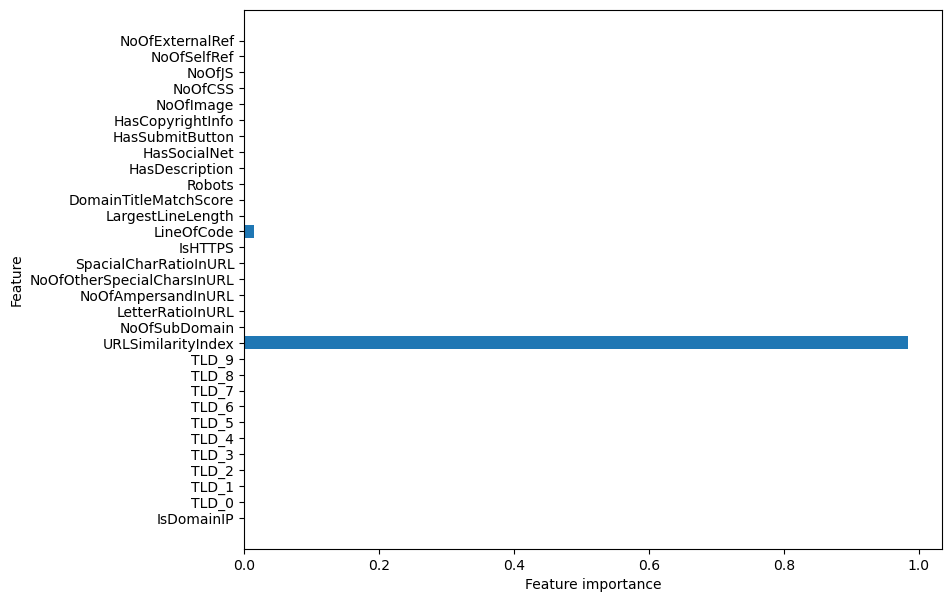

In [133]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [134]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Random Forrest

In [135]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [136]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [137]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 1.000


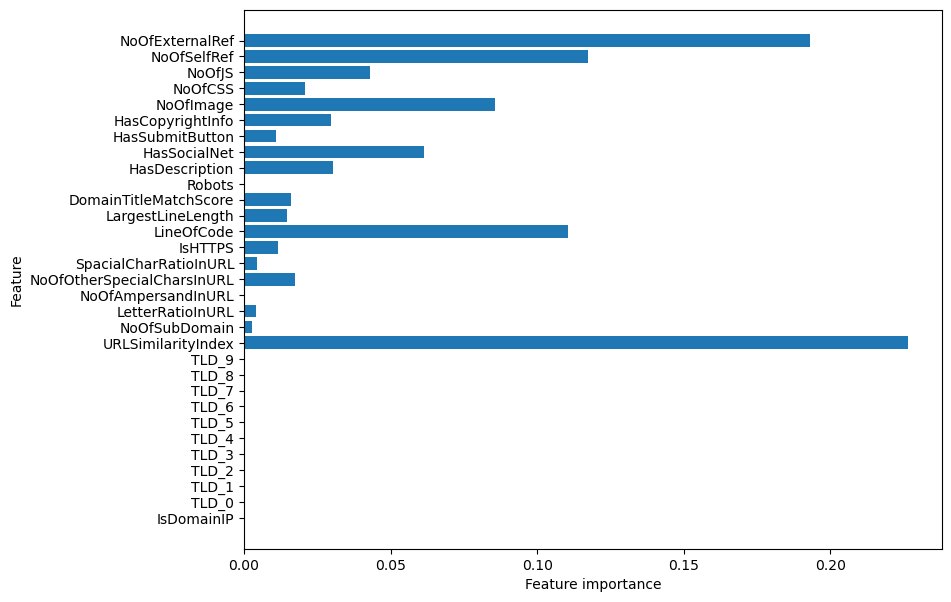

In [138]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [139]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

MLP

In [140]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

c:\Users\sandesh lavshetty\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [141]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [142]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.998
Multilayer Perceptrons: Accuracy on test Data: 0.998


In [143]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

XGBoost Classifier

In [144]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [146]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 1.000
XGBoost : Accuracy on test Data: 1.000


In [147]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

SVM

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

comparison of mofels

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)